In [1]:
from pathlib import Path
import seaborn as sns

In [36]:
import xml.etree.ElementTree as ET
from tqdm import tqdm
import pandas as pd

In [33]:
pth = Path("downloads", "task_1_depression")
dl = list()

In [34]:
for sub_pth in tqdm(pth.iterdir()):
    if not sub_pth.is_dir():
        continue
    for f in tqdm(sub_pth.iterdir()):
        if not str(f).endswith("xml"):
            continue
        tree = ET.parse(f)
        root = tree.getroot() 

        subj_id = root.find("ID").text
        for writing in root.findall("WRITING"):
            text = writing.find("TITLE").text + writing.find("TEXT").text
            date_time = writing.find("DATE").text
            dl.append((subj_id, date_time, text))

820it [00:02, 293.25it/s]
820it [00:09, 90.33it/s]
820it [00:09, 90.30it/s]
820it [00:10, 77.07it/s]
820it [00:09, 89.15it/s]
820it [00:09, 90.69it/s]
820it [00:08, 92.93it/s]
820it [00:08, 92.09it/s]
820it [00:08, 94.86it/s]
820it [00:10, 76.91it/s]
13it [01:26,  6.69s/it]


In [41]:
df = pd.DataFrame(dl, columns=["user", "date_time", "text"])

In [50]:
df.date_time = pd.to_datetime(df.date_time)

In [60]:
df["time_stamp"] = df.date_time.apply(lambda x : int(x.timestamp()))

<AxesSubplot: xlabel='user', ylabel='Count'>

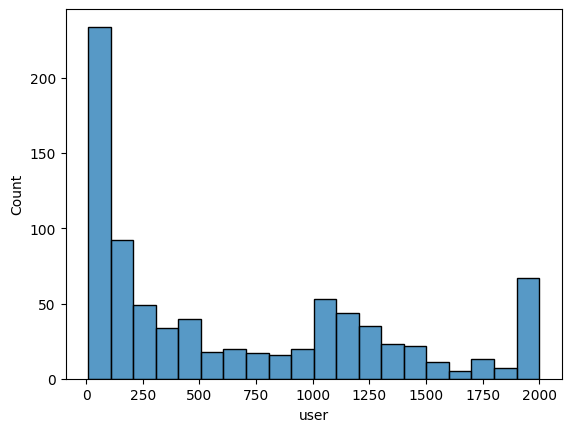

In [67]:
sns.histplot(df.user.value_counts(), bins=20)

In [72]:
df.to_csv(Path(pth, "depression_merged.csv"), index=False)